# Introduction

In this kernel I will go through......<br>
<br>
This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

# Data preparation

## Import libraries

In [1]:
# Data engineering.
import pandas as pd
import numpy as np

# Regular expressions module.
#import re

# Data visualization and frame's visualization options.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")

## Load data files

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

## Quick view at dataset

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Features

checking cardinality, nie biore pod uwage ID oraz target variable

In [6]:
from collections import OrderedDict
counts = {'Constant': OrderedDict(), 'Binary': OrderedDict(), 'Categorical': OrderedDict()}


for feat in [x for x in train_df.columns if 'X' in x]:    
    typ = train_df[feat].dtype
    uniq = len(np.unique(train_df[feat]))
    
    if uniq == 1:
        counts['Constant'][feat] = uniq 
    elif uniq == 2 and typ == np.int64:
        counts['Binary'][feat] = uniq
    else:
        counts['Categorical'][feat] = uniq

In [7]:
print('Constant features:', len(counts['Constant'].keys()))
print('Binary features:', len(counts['Binary'].keys()))
print('Categorical features:', len(counts['Categorical'].keys()))

Constant features: 12
Binary features: 356
Categorical features: 8


we have 12 features which only have a single value in them - these are pretty useless for supervised algorithms

## Target feature

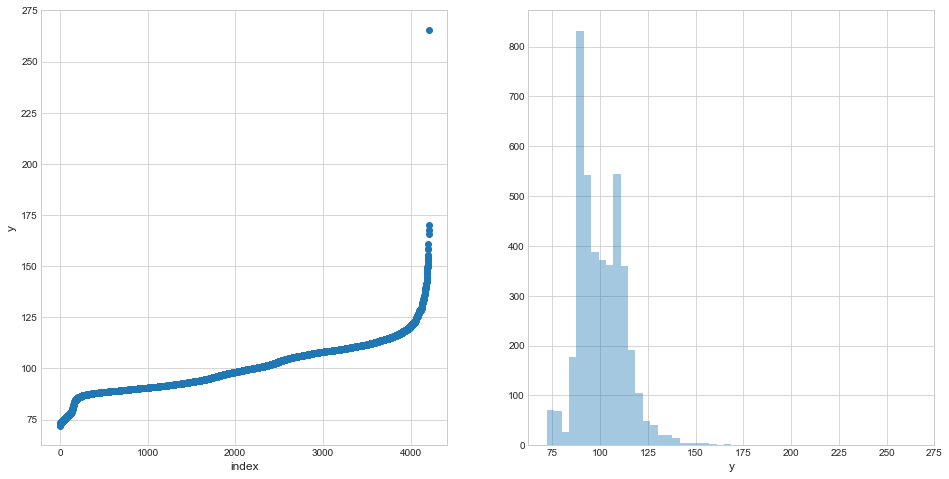

In [8]:
val = np.sort(train_df.y.values)

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.scatter(range(train_df.shape[0]), val)
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.subplot(122)
sns.distplot(val, bins=50, kde=False)
plt.xlabel('y', fontsize=12)

plt.show()

## Cleaning

- handling outliers and missing values

In [9]:
train_df = train_df[train_df['y'] < 200]

# Data exploration

## Factor levels distribution

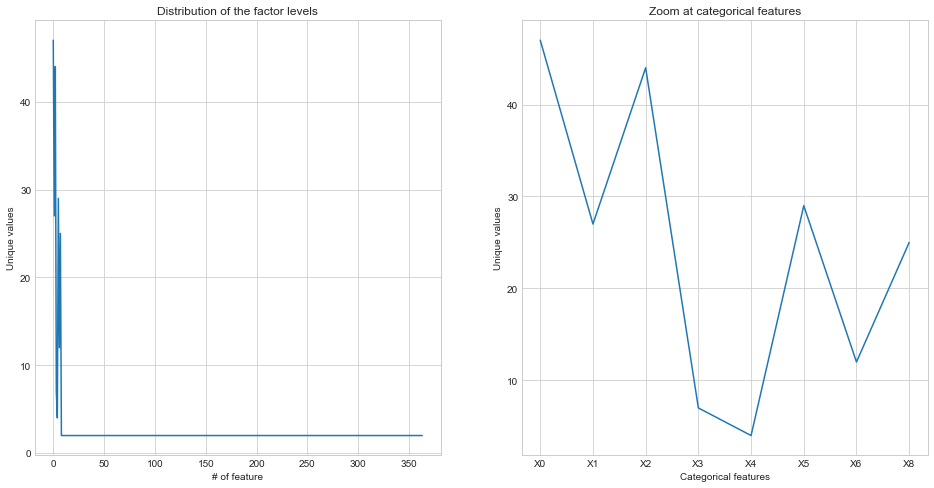

In [10]:
x = np.array(list(counts['Categorical'].values()) + list(counts['Binary'].values()))

fig = plt.figure(figsize=(16,8))

no1 = fig.add_subplot(121)
no1.plot(x)
no1.set_title('Distribution of the factor levels')
plt.xlabel('# of feature')
plt.ylabel('Unique values')


no2 = fig.add_subplot(122)
no2.plot(x[:8])
no2_labels = no2.get_xticks().tolist()
no2_labels[1:-1] = list(counts['Categorical'].keys())
no2.set_xticklabels(no2_labels)
no2.set_title('Zoom at categorical features')
plt.xlabel('Categorical features')
plt.ylabel('Unique values')


plt.show()

In [11]:
counts['Categorical']

OrderedDict([('X0', 47),
             ('X1', 27),
             ('X2', 44),
             ('X3', 7),
             ('X4', 4),
             ('X5', 29),
             ('X6', 12),
             ('X8', 25)])

## Features insight

- removing 0 variation features

In [12]:
counts['Constant'].keys()

odict_keys(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'])

In [13]:
test_df.drop(counts['Constant'].keys(), 1, inplace=True)
train_df.drop(counts['Constant'].keys(), 1, inplace=True)

## Binary features relations

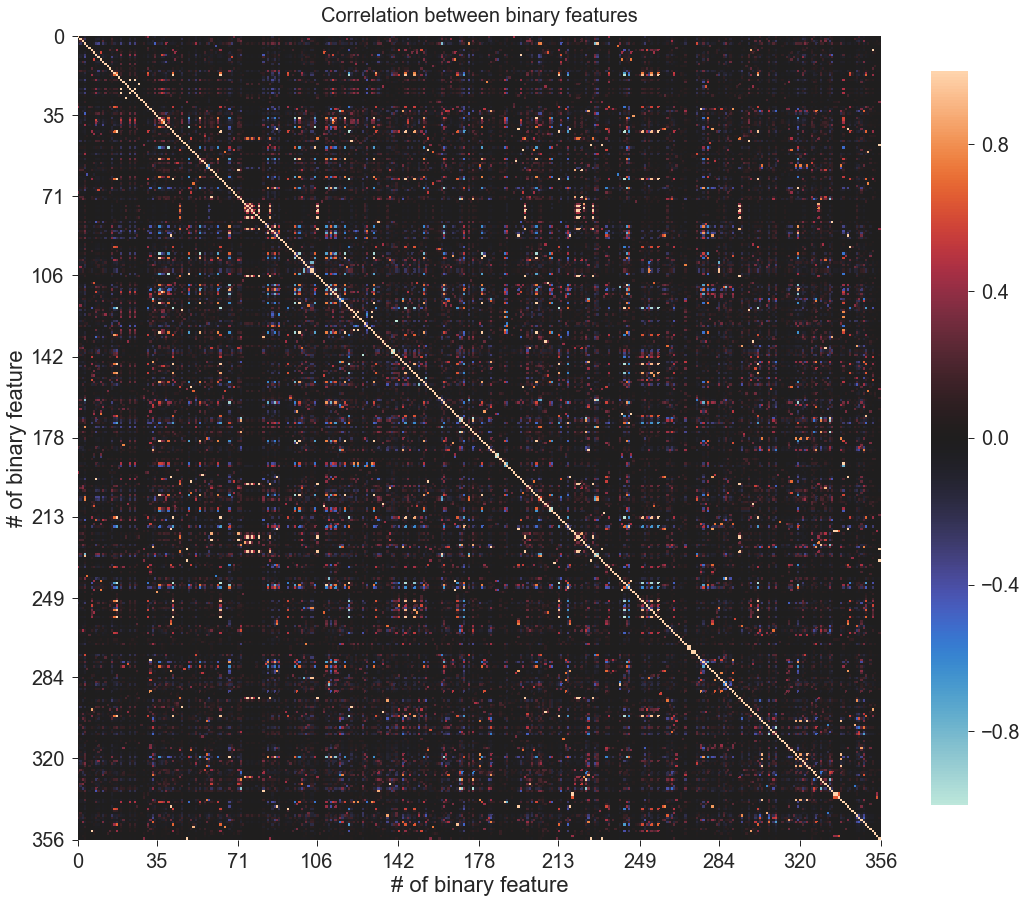

In [18]:
binary_corr_df = train_df[list(counts['Binary'].keys())]

rcstyle = {'axes.linewidth': 1.0, 'axes.edgecolor': 'black','ytick.minor.size': 5.0}
sns.set(font_scale=2.0)
sns.set_style('ticks', rcstyle)

plt.figure(figsize=(18,18))
plt.title('Correlation between binary features', y=1.01, size=20)

ax = sns.heatmap(binary_corr_df.corr(method="spearman"), vmin=-1, vmax=1, center=0, 
                 square=True, cbar_kws={"shrink": .75})

plt.xticks(rotation=0)
ax.set_xlabel('# of binary feature')
ax.set_xticks(np.linspace(0, binary_corr_df.shape[1], 11, dtype=int))
ax.set_xticklabels(np.linspace(0.0, binary_corr_df.shape[1], 11, dtype=int))

ax.set_ylabel('# of binary feature')
ax.set_yticks(np.linspace(0, binary_corr_df.shape[1], 11, dtype=int))
ax.set_yticklabels(np.linspace(0.0, binary_corr_df.shape[1], 11, dtype=int))

plt.show()

In [15]:
x = train_df[list(counts['Binary'].keys())].corr()

In [16]:
x

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,...,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
X10,1.000000,-0.033092,-0.028813,-0.100507,-0.002532,-0.005946,-0.010166,-0.010325,-0.038569,-0.047406,-0.005946,-0.035845,-0.016874,-0.005069,-0.008225,0.070299,-0.021305,-0.024621,-0.007821,-0.044215,-0.012343,-0.001791,-0.008610,-0.044215,-0.007821,-0.044215,-0.021545,-0.001791,-0.003102,-0.012475,0.132754,0.400161,-0.012475,-0.062877,-0.124495,0.005184,-0.017555,-0.036988,-0.055564,0.067443,0.037414,-0.009674,-0.024763,-0.008419,-0.017071,-0.013487,-0.051145,-0.003102,-0.004388,-0.033804,...,-0.103611,-0.006946,-0.044371,0.108237,0.015393,-0.001791,-0.017555,-0.010482,0.052611,-0.033878,-0.010788,-0.017555,-0.025943,0.027408,-0.025185,-0.083147,-0.071001,-0.027797,-0.005377,-0.053446,0.139654,-0.048993,-0.004006,-0.100263,-0.021062,-0.033430,0.021782,0.111535,0.056697,-0.006211,-0.006211,-0.004006,-0.027146,-0.030047,-0.002532,-0.009505,-0.013968,-0.002532,-0.016270,-0.062968,0.165268,-0.028625,-0.074267,-0.016874,-0.011377,-0.010482,-0.010166,-0.004741,-0.002532,-0.004388
X12,-0.033092,1.000000,0.214812,-0.246596,-0.006214,-0.014588,-0.024943,-0.025333,-0.094629,-0.116311,-0.014588,-0.087947,-0.041401,-0.012436,-0.020180,0.184657,-0.052272,-0.042632,-0.019190,-0.126789,-0.030284,-0.004393,-0.021124,-0.126789,-0.019190,-0.126789,0.017531,-0.004393,-0.007611,-0.030608,-0.004393,-0.079513,-0.030608,0.033067,-0.054629,-0.032488,-0.043071,-0.087014,-0.106966,-0.018393,-0.046444,-0.023737,-0.034230,-0.020657,-0.016817,-0.033092,-0.205482,-0.007611,-0.010767,0.049743,...,-0.043783,-0.017043,-0.014202,0.055609,-0.001937,0.054107,-0.030868,0.004500,-0.043071,-0.076413,-0.006887,0.085064,-0.063651,0.067246,-0.061792,-0.194479,-0.151798,-0.068200,-0.013192,0.255294,-0.037568,-0.046593,-0.009828,0.085777,-0.051677,0.236833,-0.210325,-0.083717,0.093643,-0.015238,-0.015238,-0.009828,-0.066604,-0.062565,-0.006214,-0.023321,-0.034270,-0.006214,0.176652,0.097290,-0.107917,-0.070232,0.030090,-0.016053,-0.027914,-0.005572,-0.024943,-0.011631,-0.006214,-0.010767
X13,-0.028813,0.214812,1.000000,-0.083200,-0.005410,-0.012701,-0.021718,-0.010530,-0.082394,-0.043152,0.007212,0.226516,-0.036048,-0.010828,-0.017571,0.110238,-0.039784,-0.052599,-0.016709,-0.095489,-0.026368,-0.003825,-0.018393,-0.095489,-0.016709,-0.095489,-0.029017,-0.003825,-0.006627,-0.026650,-0.003825,-0.065305,-0.026650,-0.128146,-0.030508,0.007849,-0.037502,-0.055285,0.004352,-0.043478,-0.042038,-0.020668,-0.052902,-0.017986,-0.022336,-0.028813,0.026193,-0.006627,-0.009375,0.039997,...,0.267359,-0.014839,-0.094789,-0.256375,-0.020668,-0.003825,-0.037502,-0.022392,-0.037502,-0.057245,-0.023047,-0.037502,-0.055422,0.054003,-0.053802,-0.076662,0.150076,-0.059382,-0.011486,0.130152,-0.192331,-0.116199,-0.008557,0.283266,0.007123,0.341686,0.046534,-0.258335,0.056699,0.005800,0.005800,0.020958,-0.057992,-0.047416,-0.005410,-0.020306,-0.029839,-0.005410,-0.034758,-0.134518,-0.169772,-0.061151,0.357211,-0.036048,-0.024305,0.023040,-0.021718,-0.010127,0.041241,-0.009375
X14,-0.100507,-0.246596,-0.083200,1.000000,-0.018872,-0.044305,0.012696,-0.076941,-0.287408,-0.353259,-0.044305,-0.267111,-0.125744,-0.004695,-0.061290,0.127021,-0.158759,-0.076955,-0.058284,-0.313236,-0.091977,0.017815,-0.064157,-0.313236,-0.058284,-0.313236,0.061719,0.017815,0.030864,0.124121,-0.013343,-0.091237,-0.092962,-0.088887,-0.471137,0.114677,-0.130816,-0.171759,0.030631,0.414868,-0.043487,-0.072093,-0.078569,-0.062740,0.022989,0.037800,-0.160188,-0.023116,0.043663,0.057430,...,-0.137514,0.069112,0.225394,0.103265,-0.002431,-0.013343,0.008925,0.072100,-0.111317,0

## Categorical features relations

# Categorical features